Problem 4

a) Generate the Legendre Polynomials (numerically)

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

N = 1000
mu = np.diff(np.linspace(-.999, .999, num=N+1))
t = np.linspace(-.999, .999, num=N)
t2 = t**2
t3 = t**3
t4 = t**4
ones = 1 + 0*t

p = [ones, t, t2, t3, t4]

L2 = lambda f, g: np.sum(f*g*mu)

In [2]:
def gram_schmidt(inn, p):
    '''
    Performs the gram_schmidt algorithm
    Inputs:
    inn - the inner product (takes 2 arguments)
    p - list of vectors to orthonormalize
    '''
    # Do gram schmidt
    q = []
    
    for p_ in p:
        # Project onto the vectors already created
        e = np.copy(p_)
        for q_ in q:
            e -= inn(p_,q_)*q_
        e /= np.sqrt(inn(e,e))
        q.append(e)
    return q
    
def plot_q(title, t, q):
    '''
    Plots the orthonormalized polynomials
    
    title - title of the graph
    t - the domain of the polynomial
    q - list of polynomials
    '''
    fig = plt.figure(1, figsize=(16,6))
    
    for i,q_ in enumerate(q):
        plt.plot(t, q_, label=title+" {0}".format(i))
    plt.legend()
    plt.title(title)
    plt.show
    
def plot_approx(title, t, act, approx):
    fig = plt.figure(1, figsize=(16,6))
    
    
    plt.plot(t, act, label="Actual")
    plt.plot(t, approx, label="Approximation")
    plt.legend()
    plt.title(title)
    plt.show

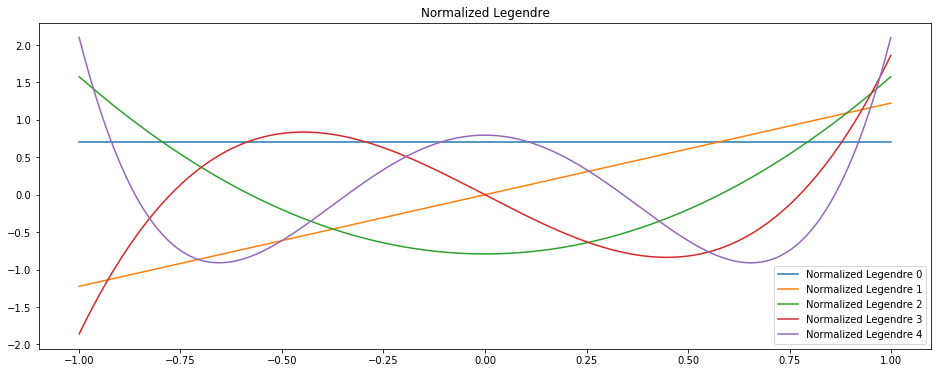

In [3]:
q = gram_schmidt(L2, p)
plot_q("Normalized Legendre", t, q)

b) Perform least squares with the function $e^{-t}$

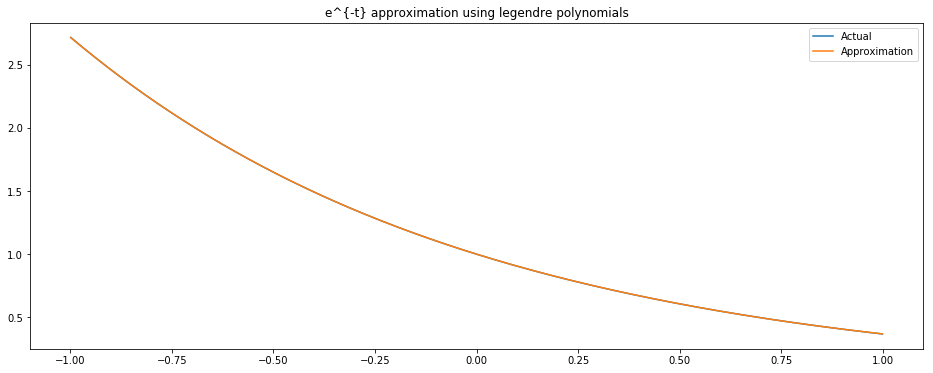

In [4]:
A = np.column_stack(q)
e_nt = np.exp(-t)

e_nt_approx = A.dot(la.inv(A.T.dot(A))).dot(A.T).dot(e_nt)

plot_approx("e^{-t} approximation using legendre polynomials",
           t, e_nt, e_nt_approx)

The residual error is

In [5]:
np.sqrt(L2(e_nt - e_nt_approx, e_nt - e_nt_approx))

0.00047024477447728887

c) Generate the Chebyshev Polynomials (numerically)

In [6]:
mu_cheb = np.diff(np.linspace(-1, 1, num=N+1))/np.sqrt(1 - t**2)
Cheb = lambda f,g: np.sum(f*g*mu_cheb)

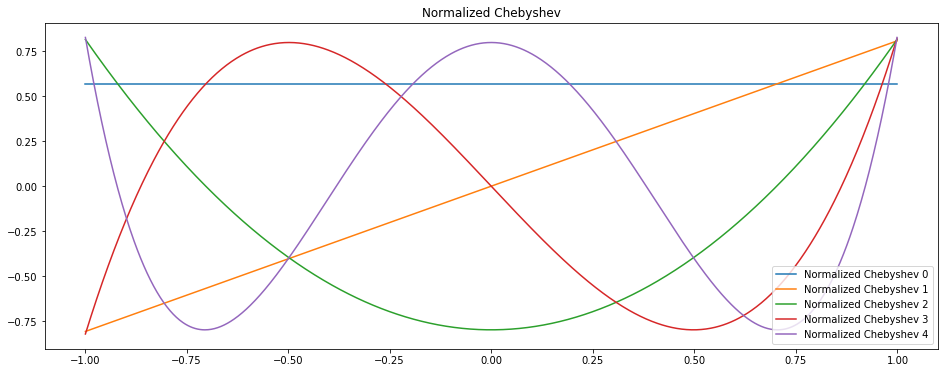

In [7]:
q = gram_schmidt(Cheb, p)
plot_q("Normalized Chebyshev", t, q)

d) Perform least squares with the function $e^{-t}$

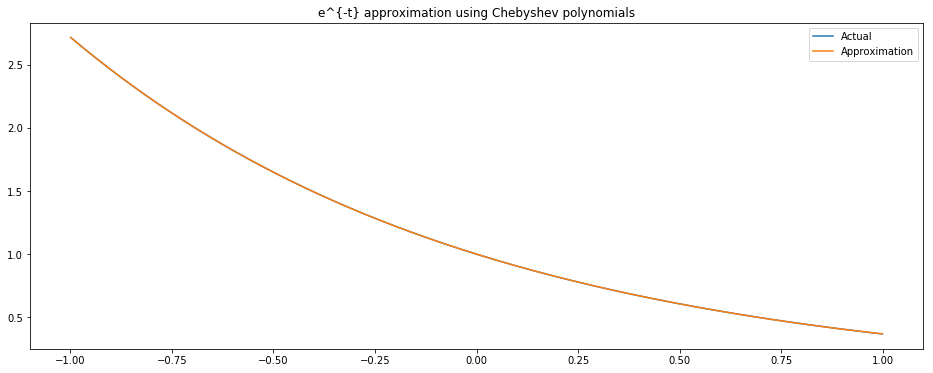

In [8]:
A = np.column_stack(q)
e_nt = np.exp(-t)

e_nt_approx = A.dot(la.inv(A.T.dot(A))).dot(A.T).dot(e_nt)

plot_approx("e^{-t} approximation using Chebyshev polynomials",
           t, e_nt, e_nt_approx)

The residual error is

In [9]:
np.sqrt(L2(e_nt - e_nt_approx, e_nt - e_nt_approx))

0.00047024477447730383

e) compare the residual error in both cases

The error in both cases are about the same. This is because you are projecting onto the same subspace, namely that spanned by $\{1, t, t^2, t^3, t^4\}$ you are just using different bases for this subspace. Any differences in the error are completely due to numerical precision.